In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## ExcelからDataを読み込む

/Users/tobiuo/learning/machine-learning/venv/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


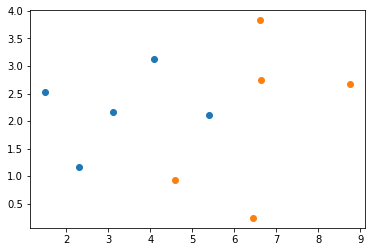

In [2]:
# Excel内の画像などは読み込めないというwarningが出るが, dataは読み込めているため無視する. 
data = pd.read_excel("15-BaggedDecisionTrees.xlsx", usecols=[0, 1, 2], header=3)[:10].astype(np.float64)
plt.scatter(data.X1[:5], data.X2[:5])
plt.scatter(data.X1[5:], data.X2[5:])

## 各Modelの予測結果から予測する

In [3]:
criteria = [5.38660215, 4.090032824, 0.925340325]

In [4]:
predict = pd.DataFrame()
predict['Model1'] = np.where(data.X1 <= criteria[0], 0, 1)
predict['Model2'] = np.where(data.X1 <= criteria[1], 0, 1)
predict['Model3'] = np.where(data.X2 <= criteria[2], 1, 0)
predict['Final'] = predict.T.mode().T
predict

,Model1,Model2,Model3,Final
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,1,0,0
5,1,1,1,1
6,1,1,0,1
7,1,1,0,1
8,0,1,1,1
9,1,1,0,1


## 精度を確かめる

In [5]:
accuracy = (predict['Final'] == data.Y).sum() / len(data)
print(str(accuracy * 100) +'%')

100.0%
